# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.115007e+01     6.956491e+00
 * time: 0.0025360584259033203
     1     2.895153e+01     4.294932e+00
 * time: 0.009103059768676758
     2     2.137736e+01     4.573029e+00
 * time: 0.014419078826904297
     3     1.472289e+01     4.125048e+00
 * time: 0.01923394203186035
     4     1.119908e+01     1.486491e+00
 * time: 0.023752927780151367
     5     1.071832e+01     3.188180e+00
 * time: 0.027412891387939453
     6     1.005549e+01     1.601150e+00
 * time: 0.03130006790161133
     7     9.298864e+00     1.414991e+00
 * time: 0.034956932067871094
     8     8.730023e+00     1.504074e+00
 * time: 0.03874707221984863
     9     8.500968e+00     9.712150e-01
 * time: 0.10762190818786621
    10     8.359064e+00     1.006764e+00
 * time: 0.11162686347961426
    11     8.198743e+00     9.049360e-01
 * time: 0.11524295806884766
    12     8.049504e+00     5.417711e-01
 * time: 0.1187429428100586
    13     8.036254e+00     7.114019e-01
 *

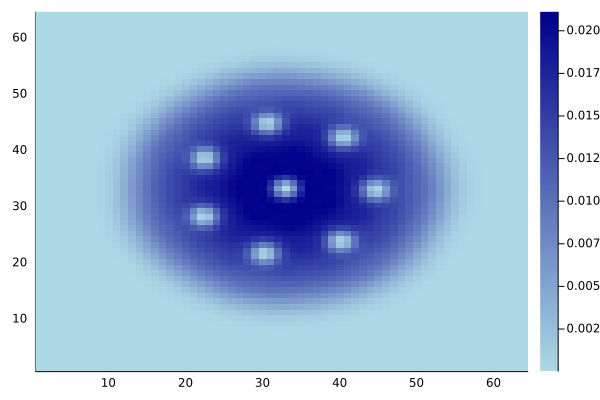

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)